In this notebook I read the frequency differencing variables from ehcoview and categorise them.

In [391]:
import numpy as np
import pandas as pd
import scipy as sc
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Load data

In [392]:
fname1 = glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S18-Sv38.csv')
fname2 = glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv120.csv')
fname3 = glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv200.csv')
fname4 = glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S120-Sv200.csv')
fname5 = glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv70.csv')

df_18_38 = pd.DataFrame()
df_38_120 = pd.DataFrame()
df_38_200 = pd.DataFrame()
df_120_200 = pd.DataFrame()
df_38_70 = pd.DataFrame()

for flist in [fname1, fname2, fname3, fname4, fname5]:
    df_all = pd.DataFrame()
    for ind in np.arange(len(flist)):
        filename = flist[ind]
        df =  pd.read_csv(filename, 
                            header=None,
                            skiprows=1,
                            engine='python')
        df_all = pd.concat([df_all, df])
        Sv_diff = df_all.iloc[:,13:].T
        Sv_diff.iloc[0:3,:] = np.nan
        
    if flist == fname1:
        df_18_38 = df_all
        Sv18_38 = Sv_diff
    elif flist == fname2:
        df_38_120 = df_all
        Sv38_120 = Sv_diff
    elif flist == fname3:
        df_38_200 = df_all
        Sv38_200 = Sv_diff
    elif flist == fname4:
        df_120_200 = df_all
        Sv120_200 = Sv_diff
    elif flist == fname5:
        df_38_70 = df_all
        Sv38_70 = Sv_diff

## Get time array

In [393]:
dtimes_18_38 =[]
for ind in range(0,len(df_18_38)):
            dtimes_18_38 = np.append(dtimes_18_38, datetime.strptime('%s %s.%s' %(df_18_38[3].values[ind],df_18_38[4].values[ind],int(df_18_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

### 120-200

In [394]:
dtimes_120_200 =[]
for ind in range(0,len(df_120_200)):
            dtimes_120_200 = np.append(dtimes_120_200 , datetime.strptime('%s %s.%s' %(df_120_200 [3].values[ind],df_120_200 [4].values[ind],int(df_120_200 [5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

## Euphausiids

In [406]:
EuphA=-10; EuphAsd=3.4
EuphA1 = Sv18_38>(EuphA-EuphAsd)
EuphA2 = Sv18_38<(EuphA+EuphAsd)
EuphausiidsA = Sv18_38.where(EuphA1 & EuphA2)

EuphB = -13.8; EuphBsd=2.9
EuphB1 = Sv38_120>(EuphB-EuphBsd)
EuphB2 = Sv38_120<(EuphB+EuphBsd)
EuphausiidsB = Sv18_38.where(EuphB1 & EuphB2)

EuphC = -16.3; EuphCsd=2.9
EuphC1 = Sv38_200>(EuphC-EuphCsd)
EuphC2 = Sv38_200<(EuphC+EuphCsd)
EuphausiidsC = Sv18_38.where(EuphC1 & EuphC2)

EuphD = -9.5; EuphDsd=4
EuphD1 = Sv38_70>(EuphD-EuphDsd)
EuphD2 = Sv38_70<(EuphD+EuphDsd)
EuphausiidsD = Sv18_38.where(EuphD1 & EuphD2)

Euphausiids = EuphausiidsA.where(~np.isnan(EuphausiidsB) | ~np.isnan(EuphausiidsC))

## Jellyfish

In [407]:
JellyA=8.2; JellyAsd=1.5
JellyA1 = Sv18_38>(JellyA-JellyAsd)
JellyA2 = Sv18_38<(JellyA+JellyAsd)
JellyfishA = Sv18_38.where(JellyA1 & JellyA2)

JellyB = 2.1; JellyBsd=1.2
JellyB1 = Sv38_120>(JellyB-JellyBsd)
JellyB2 = Sv38_120<(JellyB+JellyBsd)
JellyfishB = Sv18_38.where(JellyB1 & JellyB2)

JellyC = 2.2; JellyCsd=1.3
JellyC1 = Sv38_200>(JellyC-JellyCsd)
JellyC2 = Sv38_200<(JellyC+JellyCsd)
JellyfishC = Sv18_38.where(JellyC1 & JellyC2)

Jellyfish = JellyfishA.where(~np.isnan(JellyfishB) & ~np.isnan(JellyfishC))

## Non-Swimbladdered
Following Eulachon category

In [413]:
EulaA=1.2; EulaAsd=3.2
EulaA1 = Sv18_38>(EulaA-EulaAsd)
EulaA2 = Sv18_38<(EulaA+EulaAsd)
EulachonA = Sv18_38.where(EulaA1 & EulaA2)

EulaB = -5.8; EulaBsd=2.8
EulaB1 = Sv38_120>(EulaB-EulaBsd)
EulaB2 = Sv38_120<(EulaB+EulaBsd)
EulachonB = Sv18_38.where(EulaB1 & EulaB2)

EulaC = 3.1; EulaCsd=2.5
EulaC1 = Sv38_200>(EulaC-EulaCsd)
EulaC2 = Sv38_200<(EulaC+EulaCsd)
EulachonC = Sv18_38.where(EulaC1 & EulaC2)

Eulachon = EulachonA.where(~np.isnan(EulachonB) & ~np.isnan(EulachonC))

## Capelin

In [414]:
CapA=2.7; CapAsd=2.8
CapA1 = Sv18_38>(CapA-CapAsd)
CapA2 = Sv18_38<(CapA+CapAsd)
CapelinA = Sv18_38.where(CapA1 & CapA2)

CapB = 3.8; CapBsd=1.7
CapB1 = Sv38_120>(EulaB-EulaBsd)
CapB2 = Sv38_120<(EulaB+EulaBsd)
CapelinB = Sv18_38.where(CapB1 & CapB2)

CapC = 3.6; CapCsd=1.8
CapC1 = Sv38_200>(CapC-CapCsd)
CapC2 = Sv38_200<(CapC+CapCsd)
CapelinC = Sv18_38.where(CapC1 & CapC2)

Capelin = CapelinA.where(~np.isnan(CapelinB) & ~np.isnan(CapelinC))

## Myctophids

In [415]:
MycA = -15; MycAsd = 1.8
MycA1 = Sv18_38>(MycA-MycAsd)
MycA2 = Sv18_38<(MycA+MycAsd)
MyctophidsA = Sv18_38.where(MycA1 & MycA2)

MycB = 9.2; MycBsd = 1
MycB1 = Sv38_120>(MycB-MycBsd)
MycB2 = Sv38_120<(MycB+MycBsd)
MyctophidsB = Sv18_38.where(MycB1 & MycB2)

Myctophids = MyctophidsA.where(~np.isnan(MyctophidsB))

Text(0, 0.5, 'S$_{v, f-38}$ [dB re 1 m$^{-1}$]')

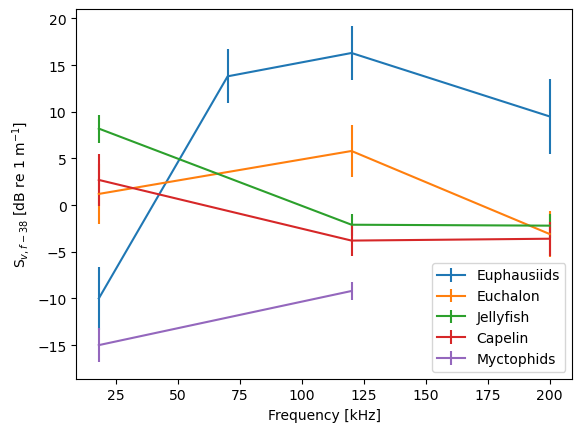

In [416]:
plt.errorbar([18,70,120,200], [EuphA, -EuphB, -EuphC, -EuphD], yerr=[EuphAsd, EuphBsd, EuphCsd, EuphDsd], label='Euphausiids')
plt.errorbar([18,120, 200], [EulaA, -EulaB, -EulaC], yerr=[EulaAsd, EulaBsd, EulaCsd], label='Euchalon')
plt.errorbar([18,120, 200], [JellyA, -JellyB, -JellyC], yerr=[JellyAsd, JellyBsd, JellyCsd], label='Jellyfish')
plt.errorbar([18,120, 200], [CapA, -CapB, -CapC], yerr=[CapAsd, CapBsd, CapCsd], label='Capelin')
plt.errorbar([18,120], [MycA, -MycB], yerr=[MycAsd, MycBsd], label='Myctophids')
plt.legend()
plt.xlabel('Frequency [kHz]')
plt.ylabel('S$_{v, f-38}$ [dB re 1 m$^{-1}$]')

Text(0, 0.5, 'Depth (m)')

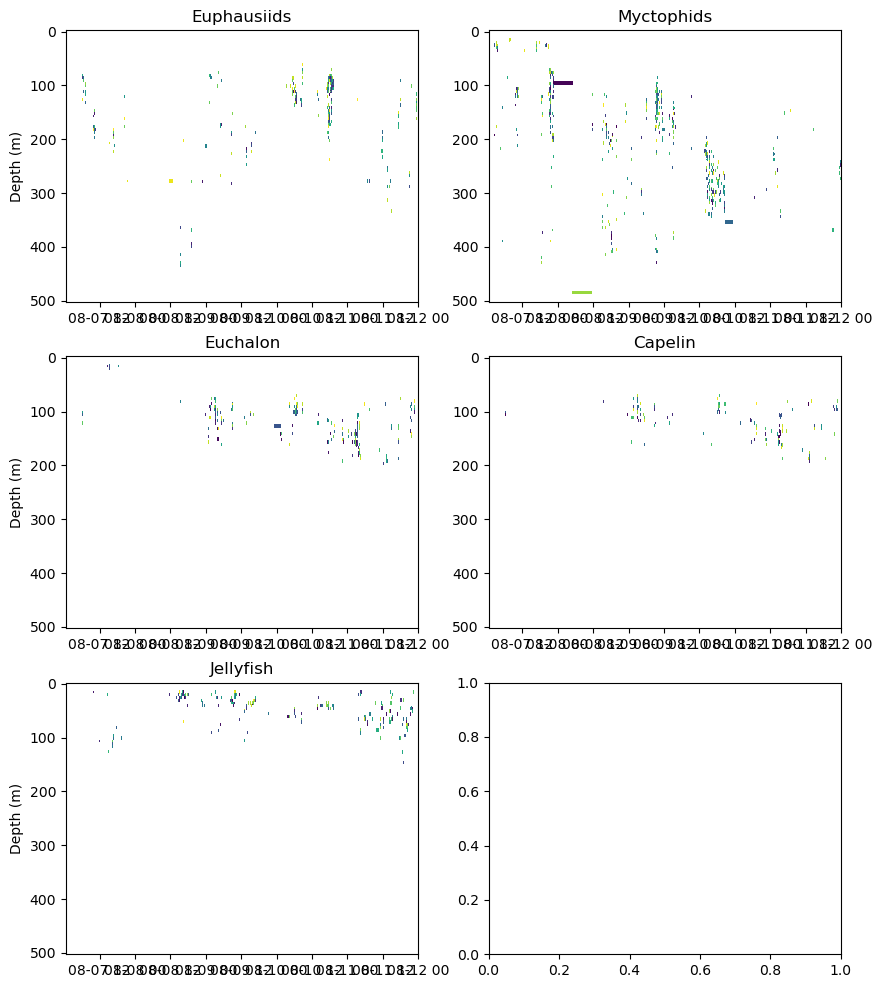

In [417]:
depth_cells = np.linspace(0,500,100)

fig,axes = plt.subplots(3,2, figsize=(10,12))
ax = axes.flatten()
ax[0].pcolor(dtimes_18_38, depth_cells, Euphausiids)
ax[0].invert_yaxis()
ax[0].set_title('Euphausiids')
ax[0].set_ylabel('Depth (m)')

ax[1].pcolor(dtimes_18_38, depth_cells, Myctophids)
ax[1].invert_yaxis()
ax[1].set_title('Myctophids')

ax[2].pcolor(dtimes_18_38, depth_cells, Eulachon)
ax[2].invert_yaxis()
ax[2].set_title('Euchalon')
ax[2].set_ylabel('Depth (m)')

ax[3].pcolor(dtimes_18_38, depth_cells, Capelin)
ax[3].invert_yaxis()
ax[3].set_title('Capelin')

ax[4].pcolor(dtimes_18_38, depth_cells, Jellyfish)
ax[4].invert_yaxis()
ax[4].set_title('Jellyfish')
ax[4].set_ylabel('Depth (m)')

In [403]:
lat = df_18_38[6]
lon = df_18_38[7]

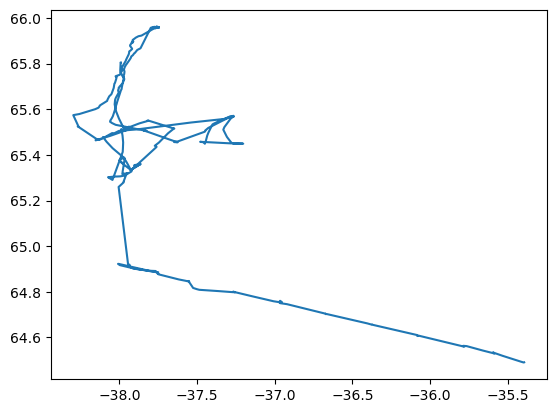

In [404]:
plt.plot(lon, lat)